In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
import numpy as np
import pandas as pd

x = np.zeros(1000)
y = np.zeros(1000)

# Read only the first 1000 lines from 'randoms_x.txt'
with open('randoms_x.txt', 'r') as file:
    for idx, line in enumerate(file):
        if idx < 1000:
            x[idx] = float(line.strip())
        else:
            break  # Exit the loop after reading the first 1000 lines

# Read only the first 1000 lines from 'randoms_y.txt'
with open('randoms_y.txt', 'r') as file:
    for idx, line in enumerate(file):
        if idx < 1000:
            y[idx] = float(line.strip())
        else:
            break  # Exit the loop after reading the first 1000 lines

points = pd.DataFrame({'X': x, 'Y': y})
points['dist'] = np.sqrt(points['X']**2 + points['Y']**2)
incircle = points[points['dist'] <= 1]
outcircle = points[points['dist'] > 1]

# The DataFrame 'points' now contains the first 1000 points, 
# and 'incircle' and 'outcircle' DataFrames contain points inside and outside the circle, respectively.


In [18]:
def quadrantCircle(x, r):
    return np.sqrt(r**2 - x**2)

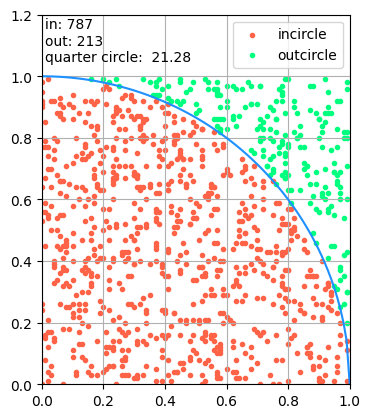

In [19]:
def visualise():
    fig, ax = plt.subplots()
    x_axis = np.linspace(0, 1, 100)  # Generate 100 points between 0 and 9
    y_axis = quadrantCircle(x_axis, 1)  # Calculate y values for the quarter circle
    ax.plot(x_axis, y_axis, color = 'dodgerblue')  # Plot the quarter circle
    ax.set_aspect('equal')  # Set aspect ratio to 'equal' to make the circle look circular
    ax.scatter(incircle['X'],incircle['Y'], color = 'tomato', marker = '.', label = 'incircle')
    ax.scatter(outcircle['X'],outcircle['Y'], color = 'springgreen', marker = '.', label = 'outcircle')
    ax.legend()
    ax.grid()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1.2)
    ax.text(0.01,1.05, f'in: {incircle.shape[0]}\nout: {outcircle.shape[0]} \nquarter circle: {incircle.shape[0]/1000  * (5.2)**2: .2f}')
    plt.show()


visualise()

In [40]:
def extend(throw=None):
    if throw is None:
        throw = 100000  # Set a default value for throw if not provided

    with open('randoms_x.txt', 'r') as file:
        x = np.array([float(line.strip()) for line in file])

    with open('randoms_y.txt', 'r') as file:
        y = np.array([float(line.strip()) for line in file])

    area = np.zeros(throw)

    points = pd.DataFrame({'X': x[:throw], 'Y': y[:throw]})
    points['dist'] = np.sqrt(points['X']**2 + points['Y']**2)
    incircle = points[points['dist'] <= 1]
    
    fraction_inside = len(incircle) / throw
    area = fraction_inside * (2*5.2)**2  # Adjust formula as needed
    pi = fraction_inside * 4

    return area, pi


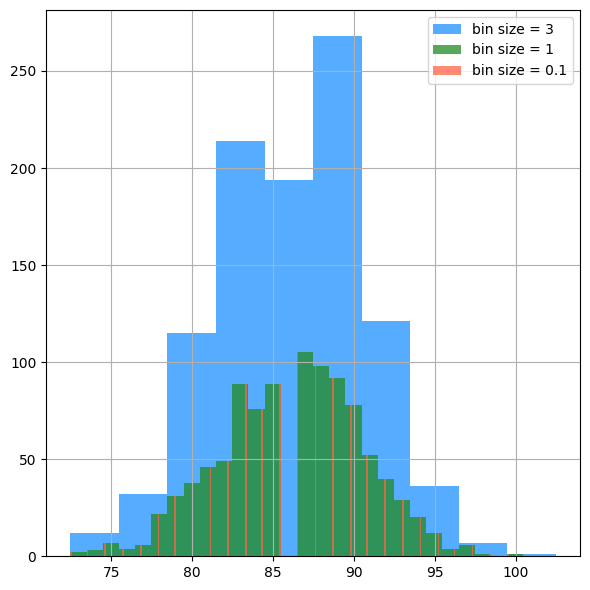

In [47]:
def visualiseExtend():
    with open('randoms_x.txt', 'r') as file:
        x = np.array([float(line.strip()) for line in file])

    with open('randoms_y.txt', 'r') as file:
        y = np.array([float(line.strip()) for line in file])

    # Crop the data into 1000 datasets of 100 values each
    num_datasets = 1000
    dataset_size = 100
    area_values = []

    for i in range(num_datasets):
        start_idx = i * dataset_size
        end_idx = (i + 1) * dataset_size
        cropped_x = x[start_idx:end_idx]
        cropped_y = y[start_idx:end_idx]

        # Calculate area for the cropped dataset
        points = pd.DataFrame({'X': cropped_x, 'Y': cropped_y})
        points['dist'] = np.sqrt(points['X']**2 + points['Y']**2)
        incircle = points[points['dist'] <= 1]
        fraction_inside = len(incircle) / dataset_size
        area = fraction_inside * (2*5.2)**2  # Adjust formula as needed
        area_values.append(area)

    # Plot histograms
    fig, ax = plt.subplots(figsize=(6, 6))

    # Calculate the minimum and maximum values of area to determine the range
    data_min, data_max = np.min(area_values), np.max(area_values)
    
    # Define bin edges for each bin size
    bin_edges_3 = np.arange(data_min, data_max + 3, 3)
    bin_edges_1 = np.arange(data_min, data_max + 1, 1)
    bin_edges_01 = np.arange(data_min, data_max + 0.1, 0.1)
    
    # Plot histograms with the specified bin edges
    ax.hist(area_values, bins=bin_edges_3, alpha=0.75, color='dodgerblue', histtype='barstacked', label='bin size = 3')
    ax.hist(area_values, bins=bin_edges_1, alpha=0.75, color='forestgreen', histtype='barstacked', label='bin size = 1')
    ax.hist(area_values, bins=bin_edges_01, alpha=0.75, color='tomato', histtype='barstacked', label='bin size = 0.1')
    
    # Add legends
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()

visualiseExtend()


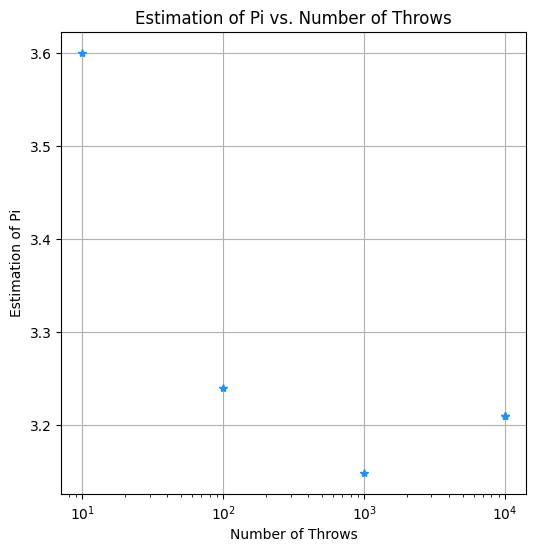

In [37]:
def visualisePi():
    throws = np.array([10, 100, 1000, 10000, 10000])
    pi_estimations = []

    # Call extend for each number of throws and collect pi estimations
    for throw in throws:
        _, pi = extend(throw)
        pi_estimations.append(pi)

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(throws, pi_estimations, marker='*', linestyle='', color='dodgerblue')
    ax.set_xlabel('Number of Throws')
    ax.set_ylabel('Estimation of Pi')
    ax.set_title('Estimation of Pi vs. Number of Throws')
    ax.set_xscale('log')  # Optional: Use logarithmic scale for x-axis to better visualize the change
    plt.grid(True)
    plt.show()

visualisePi()

* We can't have an infinite precision of randomness
* Do not overtrust CLT
* Test it : Be mindful to plot your results!
* packet fence.
* the more points we have, the gaps will be filled, but it requires more computations